## Observations and Insights

## Dependencies and starter code

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, how="left",on="Mouse ID")

## Summary statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_regimen = mouse_results.groupby(by=["Drug Regimen"]).agg(meanTV = ("Tumor Volume (mm3)","mean"),
                                               medianTV = ("Tumor Volume (mm3)","median"),
                                               stdTV = ("Tumor Volume (mm3)",np.std),
                                               semTV = ("Tumor Volume (mm3)",st.sem),
                                               countTV = ("Tumor Volume (mm3)","count"))

# Apply some formatting to the output of the Summary Table per Regimen
summary_regimen.style.format({"meanTV":"{:,.2f}",
                             "medianTV":"{:,.2f}",
                             "stdTV":"{:,.2f}",
                             "semTV":"{:,.2f}"})

,meanTV,medianTV,stdTV,semTV,countTV
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,0.33,230
Ceftamin,52.59,51.78,6.27,0.47,178
Infubinol,52.88,51.82,6.57,0.49,178
Ketapril,55.24,53.70,8.28,0.60,188
Naftisol,54.33,52.51,8.13,0.60,186
Placebo,54.03,52.29,7.82,0.58,181
Propriva,52.32,50.85,6.51,0.51,161
Ramicane,40.22,40.67,4.85,0.32,228
Stelasyn,54.23,52.43,7.71,0.57,181


## Bar plots

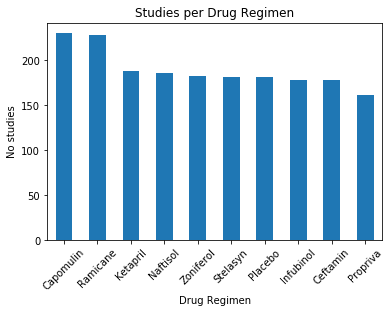

In [77]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_regimen["countTV"].sort_values(ascending=False).plot(kind="bar", rot=45)
plt.title("Studies per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No studies")
plt.show()

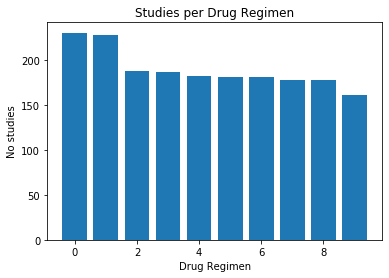

In [99]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = summary_regimen["countTV"].sort_values(ascending=False)
y_pos = np.arange(len(counts))
plt.bar(y_pos,counts,align="center")
#plt.xticks(y_pos,summary_regimen[0])
plt.title("Studies per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No studies")
plt.show()


## Pie plots

In [131]:
mouse_gender = mouse_results.groupby(by="Sex")["Mouse ID"].count()
display(mouse_gender)

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

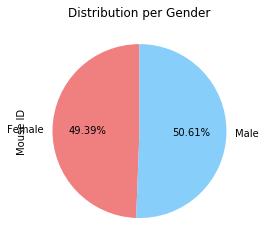

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender.plot(kind="pie", autopct="%1.2f%%",startangle=90, colors = ["lightcoral", "lightskyblue"])
plt.title("Distribution per Gender")
plt.show()

,Mouse ID
Sex,
Female,935
Male,958


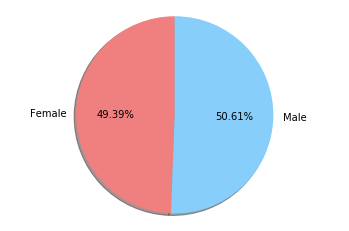

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = mouse_results.groupby(by="Sex", as_index = False)["Mouse ID"].count()
mouse_gender.set_index("Sex",inplace=True)
display(mouse_gender)
x_labels = [x for x in mouse_gender.index]
y_values= mouse_gender["Mouse ID"]
colors = ["lightcoral", "lightskyblue"]

plt.pie(y_values, labels = x_labels, colors = colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen